Import the main libraries for this project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.impute as imp

Load the datasets to analize them separately

In [3]:
# Let's make a preliminary analysis to the datasets
races_df = pd.read_csv("./dataset/races.csv", parse_dates=["date"])
cyclist_df = pd.read_csv("./dataset/cyclists.csv")

# Ciclist table preliminary analysis
The key for cyclist table is column **_url** that is the name of the cyclist, while in races table the column **cyclist** is a foreign key

In [4]:
def check_key(df, column_name):
    # Check if there are no NaN values and if all values are unique
    return df[column_name].notna().all() and df[column_name].is_unique


def check_in(df1, df2, col1, col2):
    return df1[col1].isin(df2[col2]).all()


print(check_key(cyclist_df, "_url"))  # This column is a key for clyclist dataset
print(
    check_in(races_df, cyclist_df, "cyclist", "_url")
)  # These columns can be used for join

True
True


Some columns have missing values in the cyclist table. For birth_year and nationality we can try to fix them, while we cannot fix weight and height columns since they are NaN for half of the table.

In [5]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


Only cyclist **scott-davies** has missing nationality. We can fix its nationality and birth_year by looking on the web.

In [6]:
# Only one cyclist has nan nationality.
print(cyclist_df.loc[cyclist_df.nationality[cyclist_df.nationality.isna()].index])


def fix_cyclist(df):
    mask = df["nationality"].isna()
    cyclists = set(df.loc[mask, "_url"])
    for c in cyclists:
        mask = df["_url"] == c
        df.loc[mask, "nationality"] = "Britain"
        df.loc[mask, "birth_year"] = 1995


# Fix using Wikipedia
fix_cyclist(cyclist_df)
print(cyclist_df.loc[cyclist_df.nationality[cyclist_df._url == "scott-davies"].index])

           _url           name  birth_year  weight  height nationality
9  scott-davies  Scott  Davies         NaN     NaN     NaN         NaN
           _url           name  birth_year  weight  height nationality
9  scott-davies  Scott  Davies      1995.0     NaN     NaN     Britain


These cyclist instead have missing birth_year, they are few we can try to fix them.

In [7]:
print(cyclist_df.loc[cyclist_df.birth_year[cyclist_df.birth_year.isna()].index])
# found on procyclingstats.com
dates_dict = {
    "vladimir-malakov": 1958,
    "antonio-zanini	": 1965,
}

for k, v in dates_dict.items():
    mask = cyclist_df["_url"] == k
    cyclist_df.loc[mask, "birth_year"] = v

                    _url                 name  birth_year  weight  height  \
601     vladimir-malakov    Vladimir  Malakov         NaN     NaN     NaN   
894       antonio-zanini      Antonio  Zanini         NaN     NaN     NaN   
2408   filippo-simonetti   Filippo  Simonetti         NaN     NaN     NaN   
2515       carlos-garcia       Carlos  García         NaN     NaN     NaN   
2536     alexandr-osipov     Alexandr  Osipov         NaN     NaN     NaN   
3046    nicolai-kosyakov    Nicolai  Kosyakov         NaN     NaN     NaN   
3551          nevens-guy          Guy  Nevens         NaN     NaN     NaN   
4142         oscar-pumar         Oscar  Pumar         NaN     NaN     NaN   
4384       javier-luquin       Javier  Luquin         NaN     NaN     NaN   
4756      thierry-lauder      Thierry  Lauder         NaN     NaN     NaN   
6072  sergei-jermachenko  Sergei  Jermachenko         NaN     NaN     NaN   
6080     batik-odriozola     Batik  Odriozola         NaN     NaN     NaN   

Eliminate cyclists that do not participate in any race

In [8]:
nan_merge_df = pd.merge(
    races_df, cyclist_df, left_on="cyclist", right_on="_url", how="outer"
)
bad_cyclists = nan_merge_df.loc[nan_merge_df._url_x.isna(), "_url_y"].unique()

print(cyclist_df.shape)
cyclist_df = cyclist_df.loc[~cyclist_df._url.isin(bad_cyclists)]
cyclist_df.shape

(6134, 6)


(6095, 6)

Text(0.5, 1.0, 'Distribution of Birth Years')

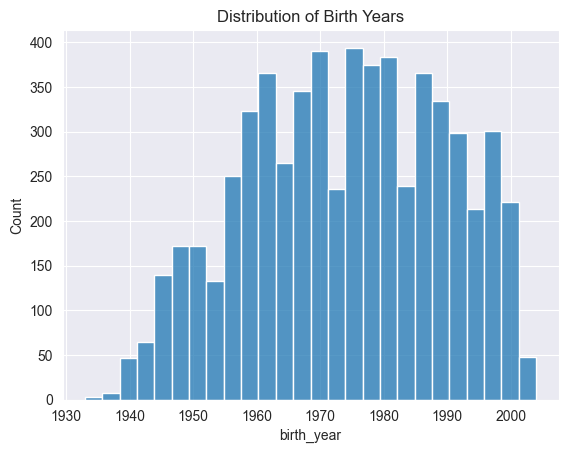

In [9]:
# plot the distribution of birth years
sns.histplot(cyclist_df.birth_year)
plt.title("Distribution of Birth Years")

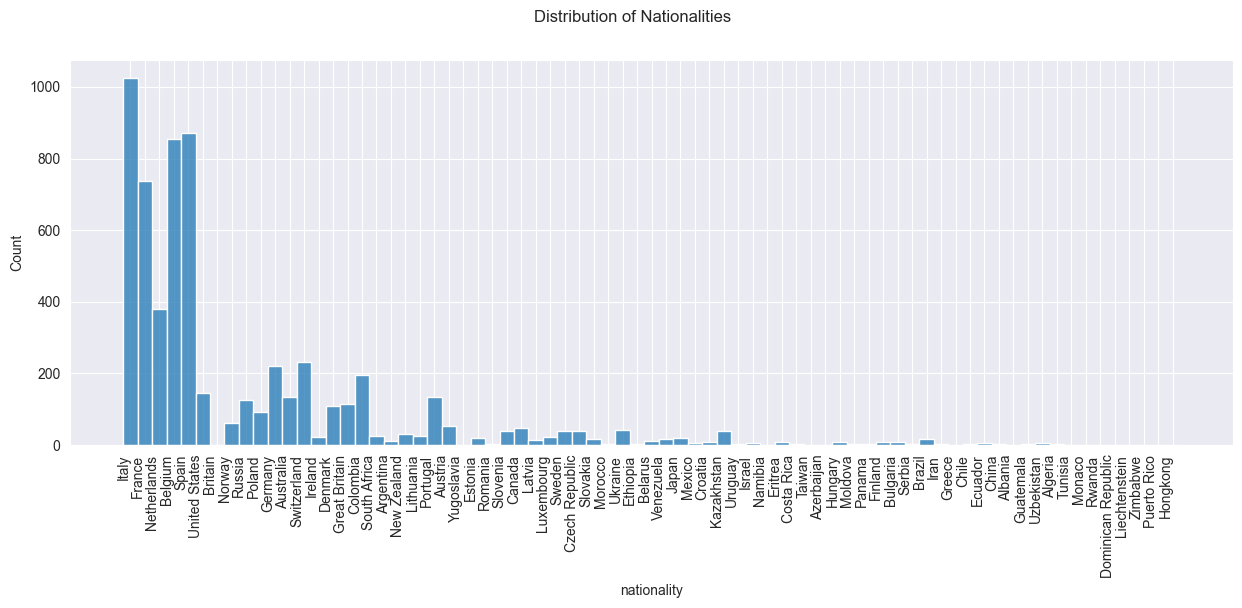

In [10]:
# plot distribution of nationalities
plt.figure(figsize=(15, 5))
sns.histplot(cyclist_df.nationality)
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Nationalities")
plt.show()

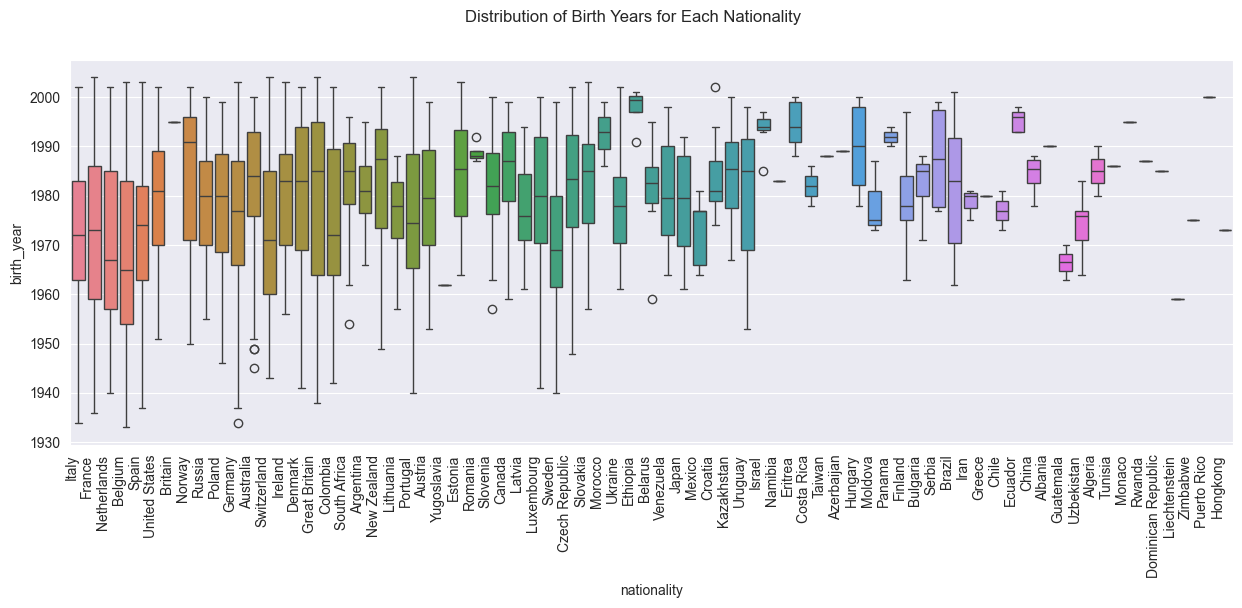

In [11]:
# plot distribution of birth year for each nationality
plt.figure(figsize=(15, 5))
sns.boxplot(x="nationality", y="birth_year", data=cyclist_df, hue="nationality")
plt.xticks(rotation=90, ha="right")
plt.suptitle("Distribution of Birth Years for Each Nationality")
plt.legend([], [], frameon=False)
plt.show()

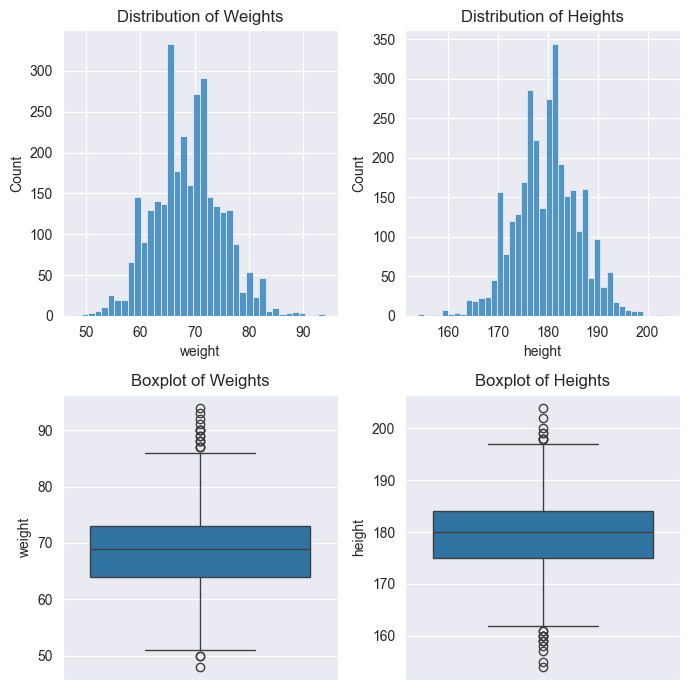

In [12]:
# plot of weith and height distribution
plt.figure(figsize=(7, 7))
plt.subplot(2, 2, 1)
sns.histplot(cyclist_df.weight)
plt.title("Distribution of Weights")
plt.subplot(2, 2, 2)
sns.histplot(cyclist_df.height)
plt.title("Distribution of Heights")
plt.subplot(2, 2, 3)
sns.boxplot(y="weight", data=cyclist_df)
plt.title("Boxplot of Weights")
plt.subplot(2, 2, 4)
sns.boxplot(y="height", data=cyclist_df)
plt.title("Boxplot of Heights")
plt.tight_layout()
plt.show()

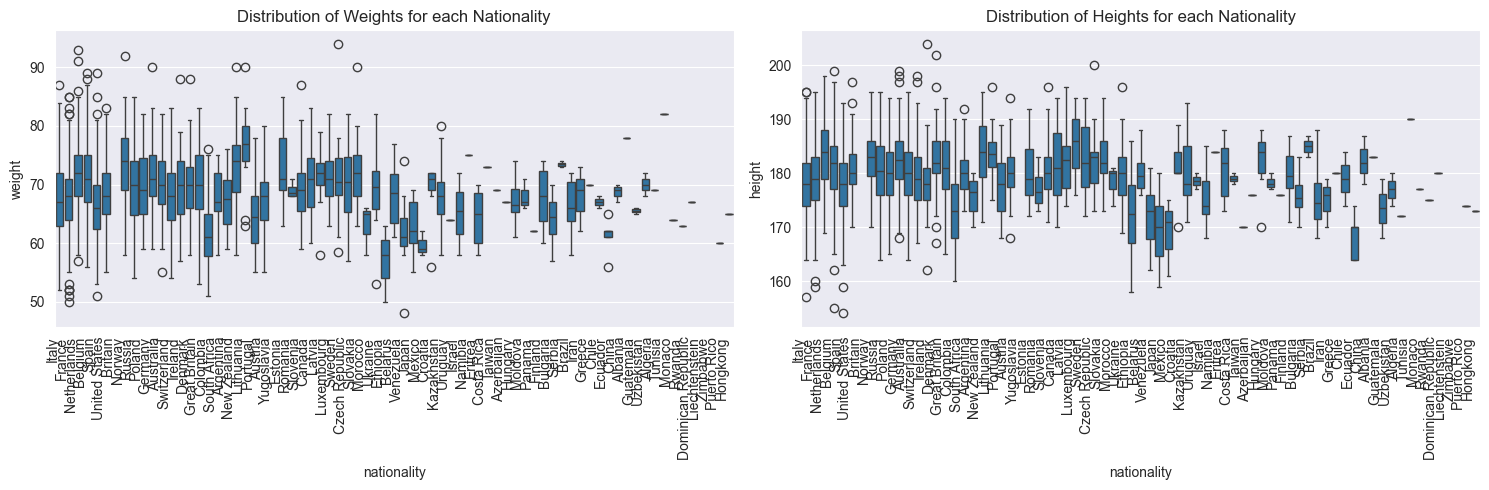

In [13]:
# distribution of weights and heights for each nationality
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="nationality", y="weight", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Weights for each Nationality")
plt.subplot(1, 2, 2)
sns.boxplot(x="nationality", y="height", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Distribution of Heights for each Nationality")
plt.tight_layout()
plt.show()

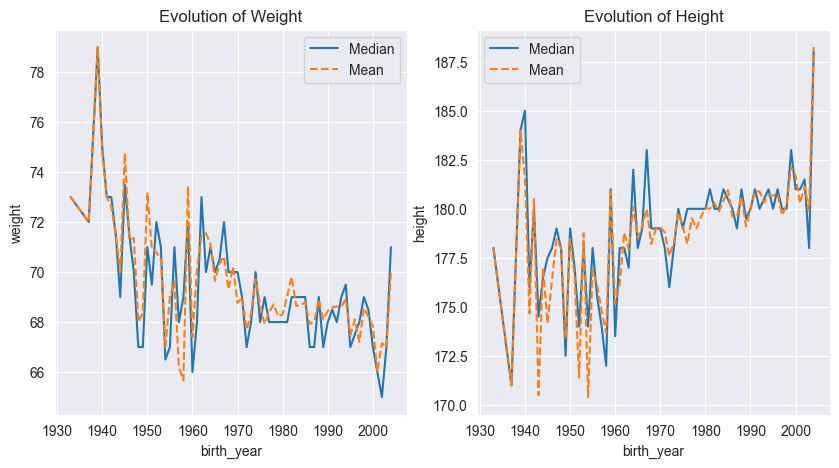

In [14]:
# trend of weight and height over the years
medians = cyclist_df.groupby("birth_year")[["height", "weight"]].median().reset_index()
means = cyclist_df.groupby("birth_year")[["height", "weight"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x="birth_year", y="weight", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="weight", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Weight")
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x="birth_year", y="height", data=medians, label="Median", linestyle="-")
sns.lineplot(x="birth_year", y="height", data=means, label="Mean", linestyle="--")
plt.title("Evolution of Height")
plt.legend()
plt.show()

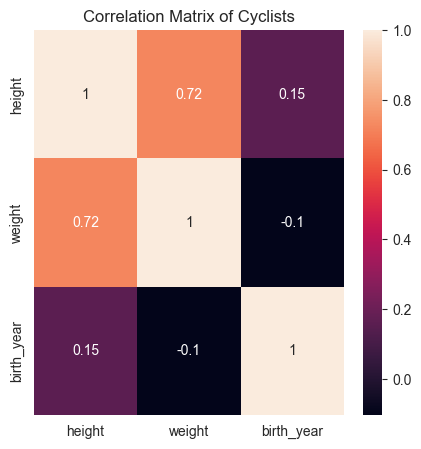

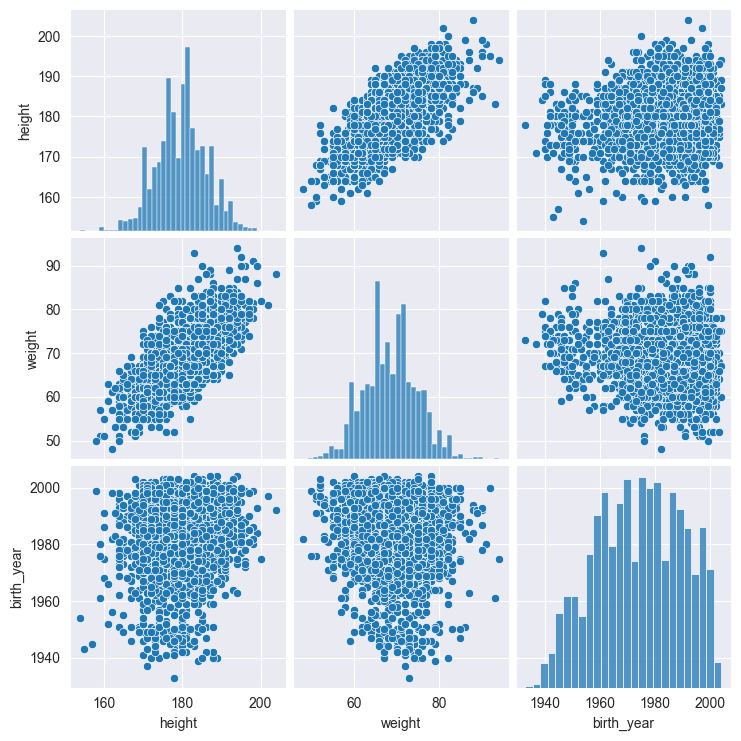

In [15]:
# correlation matrix of cyclists
corr = cyclist_df[["height", "weight", "birth_year"]].corr(method="pearson")
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix of Cyclists")
sns.heatmap(corr, annot=True)
sns.pairplot(cyclist_df[["height", "weight", "birth_year"]])

In [16]:
# impute weight and height based on the other
old_cyclist = cyclist_df.copy()
imputer = imp.KNNImputer(n_neighbors=5)
all__df = cyclist_df.loc[
    cyclist_df.weight.notna() | cyclist_df.height.notna(), ["weight", "height"]
]
imputations = imputer.fit_transform(all__df)
cyclist_df.loc[
    cyclist_df.weight.notna() | cyclist_df.height.notna(), ["weight", "height"]
] = imputations

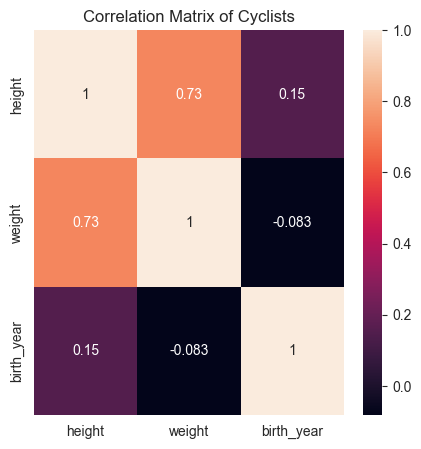

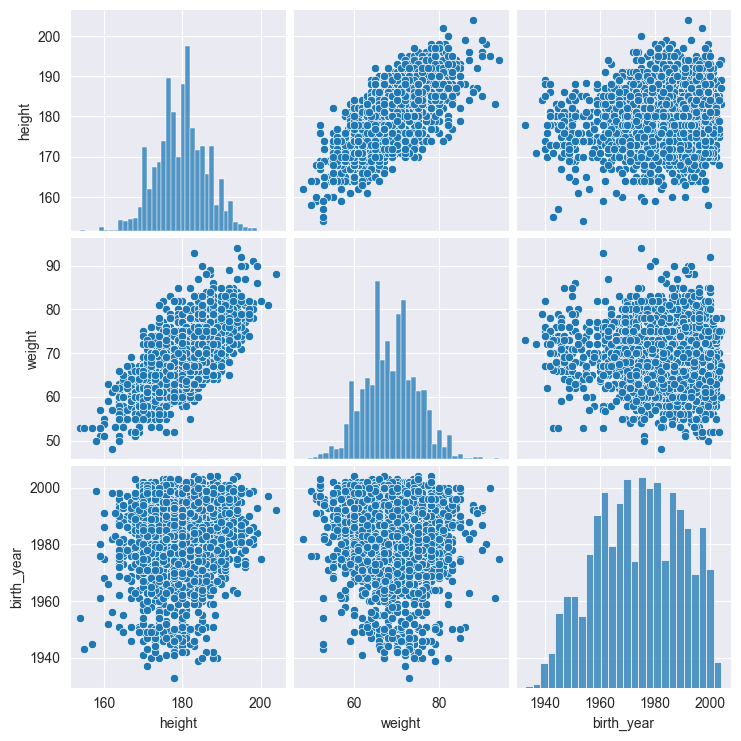

In [17]:
corr = cyclist_df[["height", "weight", "birth_year"]].corr(method="pearson")
plt.figure(figsize=(5, 5))
plt.title("Correlation Matrix of Cyclists")
sns.heatmap(corr, annot=True)
sns.pairplot(cyclist_df[["height", "weight", "birth_year"]])

# Races table preliminary analysis
Some columns have missing values in races table (**points**, **uci_points**, **climb_total**, **profile**, **average_temperature**, **cyclist_age**, **cycilist_team**).

We can try to fix columns **points**, **cyclist_age** since there are few missing values.
We can drop the column **average_temperature** since there are too many missing values.
We can try to analyze the distribution of **climb_total** over **profile** to try to esitimate and fix the columns.
We can assume that missing values if **cyclist_team** implies 'No team'

In [18]:
print(races_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   _url                 589865 non-null  object        
 1   name                 589865 non-null  object        
 2   points               589388 non-null  float64       
 3   uci_points           251086 non-null  float64       
 4   length               589865 non-null  float64       
 5   climb_total          442820 non-null  float64       
 6   profile              441671 non-null  float64       
 7   startlist_quality    589865 non-null  int64         
 8   average_temperature  29933 non-null   float64       
 9   date                 589865 non-null  datetime64[ns]
 10  position             589865 non-null  int64         
 11  cyclist              589865 non-null  object        
 12  cyclist_age          589752 non-null  float64       
 13  is_tarmac     

In [19]:
# removing date time as its not needed
races_df.date = races_df.date.dt.normalize()

In [20]:
# too much NaN values for average temperature
races_df.drop(columns=["average_temperature"], inplace=True)

### Resolve race names

First of all let's check if same course in different years have different names. it's right Ex: (Vuelta al País Vasco), (Vuelta Ciclista al País Vasco) also according to internet (Itzulia Basque Country) belongs to the same course. This is true but the url is always the same. so to avoid ambiguity we can drop name column and use the name inside the url column to make later analysis

In [21]:
# of course, not only according to internet, as in the dataset we can clearly see they share the same race name in _url field
print(races_df["name"].unique())
print(
    races_df[
        races_df["name"].isin(
            [
                "Vuelta al País Vasco",
                "Vuelta Ciclista al País Vasco",
                "Itzulia Basque Country",
            ]
        )
    ]["_url"].unique()
)

['Tour de France' 'Vuelta a España' 'Volta Ciclista a Catalunya'
 'Paris - Nice' 'Tirreno-Adriatico' 'Critérium du Dauphiné Libéré'
 'Critérium du Dauphiné' 'Ronde van Vlaanderen / Tour des Flandres'
 'Milano-Sanremo' 'Tour de Suisse' "Giro d'Italia" 'Gran Camiño'
 'Tour de Romandie' 'Volta a Catalunya' 'La Vuelta ciclista a España'
 'La Flèche Wallonne' 'E3-Prijs Harelbeke' 'Vuelta al País Vasco'
 'Vuelta Ciclista al País Vasco' 'Liège - Bastogne - Liège'
 'Paris-Roubaix' 'UAE Tour' 'World Championships ME - Road Race'
 'Amstel Gold Race' 'Dwars door België / À travers la Belgique'
 'Itzulia Basque Country' 'World Championships - Road Race'
 'Criterium du Dauphiné Libére' 'Omloop Het Volk'
 'Clasica Ciclista San Sebastian' 'Paris - Roubaix' 'Strade Bianche'
 'Giro di Lombardia' 'Criterium du Dauphiné' 'O Gran Camiño'
 'Grand Prix Cycliste de Quebec' 'Grand Prix Cycliste de Montréal'
 'Ronde van Vlaanderen - Tour des Flandres ME'
 'Dwars door Vlaanderen - A travers la Flandre ME'
 'Clá

Let's create another column that contains a non ambigous name for later analysis

In [22]:
races_df["race"] = races_df["_url"].str.split("/").str[0]
# races_df.drop(columns=["name"], inplace=True)
races_df["year"] = races_df.date.dt.year
races_df.year = races_df.year.astype(int)

temp_df = races_df.groupby("_url")[["race", "year"]].first().reset_index()
temp_df["stage"] = temp_df["_url"].str.split("/").str[-1]
temp_df.stage.unique()

# check for each race for each year, if the stage name does not repeat
len(temp_df) - len(
    temp_df[["race", "year", "stage"]].drop_duplicates()
)  # 0, so no duplicates, meaning our way is good

0

In [23]:
races_df.drop(columns=["name"], inplace=True)
races_df.race.unique()

array(['tour-de-france', 'vuelta-a-espana', 'volta-a-catalunya',
       'paris-nice', 'tirreno-adriatico', 'dauphine',
       'ronde-van-vlaanderen', 'milano-sanremo', 'tour-de-suisse',
       'giro-d-italia', 'gran-camino', 'tour-de-romandie',
       'la-fleche-wallone', 'e3-harelbeke', 'itzulia-basque-country',
       'liege-bastogne-liege', 'paris-roubaix', 'uae-tour',
       'world-championship', 'amstel-gold-race', 'dwars-door-vlaanderen',
       'omloop-het-nieuwsblad', 'san-sebastian', 'strade-bianche',
       'il-lombardia', 'gp-quebec', 'gp-montreal'], dtype=object)

### Resolve NaN points

We can try to check if **points** column is mutually eclusive with **uci_points** column. They aren't

In [24]:
# Points and UCI_Points are not mutually exclusive columns
def are_xor_columns(df, col1, col2):
    mask = df[col1].isna() ^ df[col2].isna()
    res = df.loc[mask, "cyclist"].tolist()
    return len(res) == len(df)


print(are_xor_columns(races_df, "points", "uci_points"))

False


In [25]:
# imputing missing points from procyclingstats.com
races_df.loc[races_df.points.isna()]._url.unique()
miss_points_dict = {
    "vuelta-a-espana/1994/stage-5": 80,
    "tour-de-france/1986/stage-19": 100,
    "tour-de-france/1988/prologue": 100,
    "tour-de-france/2019/stage-19": 100,
}

for k, v in miss_points_dict.items():
    mask = races_df._url == k
    races_df.loc[mask, "points"] = v

# convert to int
races_df["points"] = races_df["points"].astype(int)

Need to see distribution of points. to do that creating columns for easy of access

In [26]:
# stage column makes easier to query the dataset
# cfeating dataset about stages
races_df["stage"] = races_df._url.str.split("/").str[-1]
races_df.stage.unique()
stages_df = races_df.groupby("_url")[
    [
        "_url",
        "stage",
        "race",
        "date",
        "points",
        "uci_points",
        "length",
        "climb_total",
        "profile",
        "startlist_quality",
        "is_tarmac",
        "year",
    ]
].first()

In [27]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   int64         
 5   uci_points         1599 non-null   float64       
 6   length             5281 non-null   float64       
 7   climb_total        3067 non-null   float64       
 8   profile            2873 non-null   float64       
 9   startlist_quality  5281 non-null   int64         
 10  is_tarmac          5281 non-null   bool          
 11  year               5281 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(3), object(3)
memory 

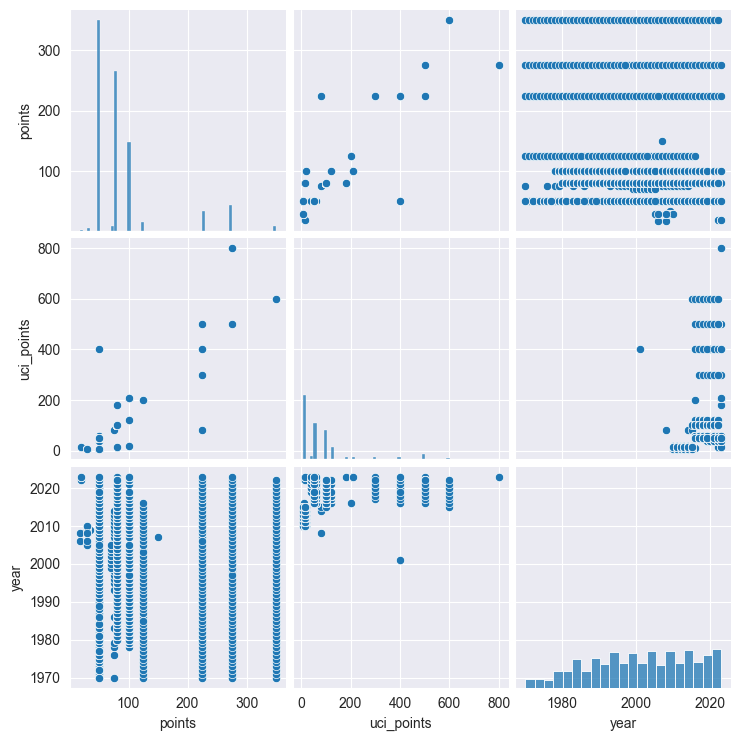

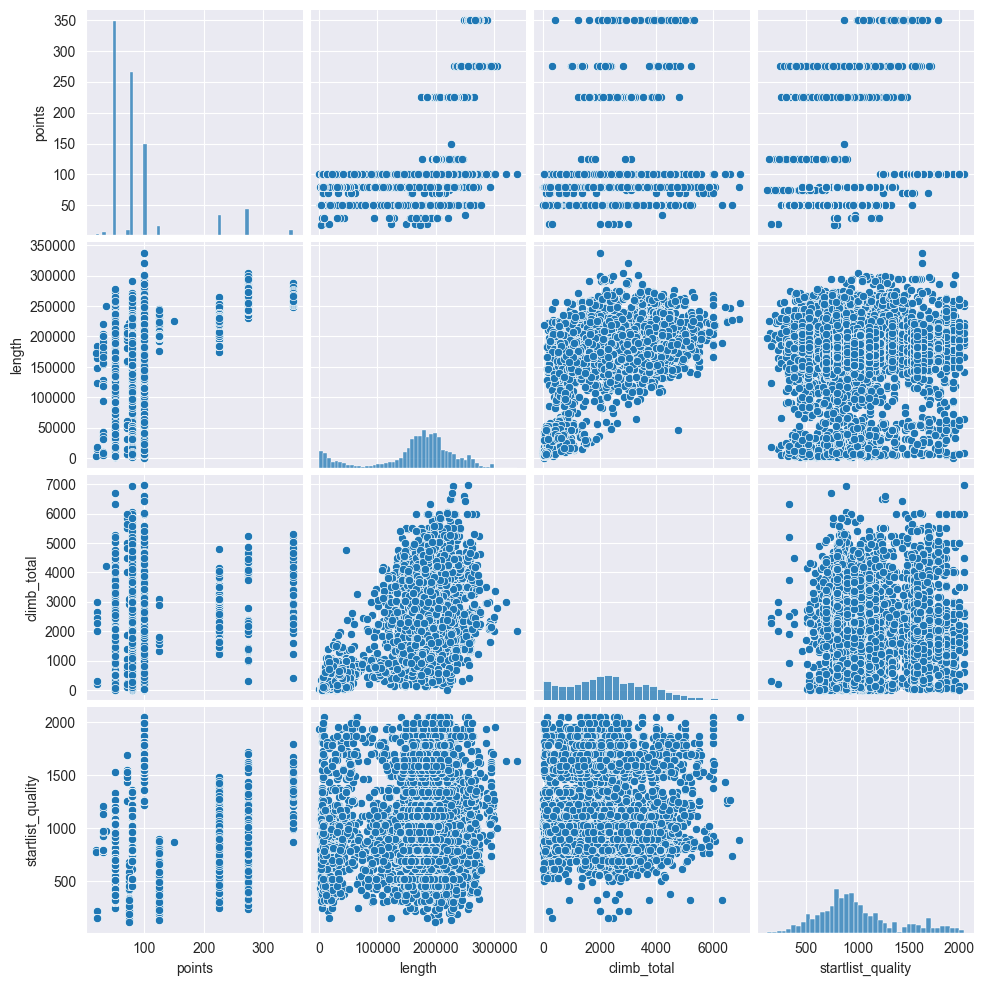

In [28]:
# show points and uci_points distribution
sns.pairplot(stages_df[["points", "uci_points", "year"]])
sns.pairplot(stages_df[["points", "length", "climb_total", "startlist_quality"]])

**Considerations**: 
* uci_points can be dropped (clearly positively correlated to points)
* need to see if points correlated to startlist quality (it is not in analysis below)

In [29]:
stages_df.drop(columns=["uci_points"], inplace=True)
races_df.drop(columns=["uci_points"], inplace=True)

### Resolve is_tarmac (He said it should be always true at least this column (listen to rec q&a) we can drop it)


**is_cobbled** and **is_gravel** are all false (we can drop them).
**is_tarmac** is sometimes true and false. It's ok but when it's false also the other columns are false (Noise!!). 

In [30]:
# Some columns are all False
print(races_df.is_cobbled.unique())
print(races_df.is_gravel.unique())
print(races_df.is_tarmac.unique())

[False]
[False]
[ True False]


In [31]:
races_df.drop(columns=["is_cobbled", "is_gravel"], inplace=True)

<Axes: title={'center': 'Correlation Matrix of Stages tarmac'}>

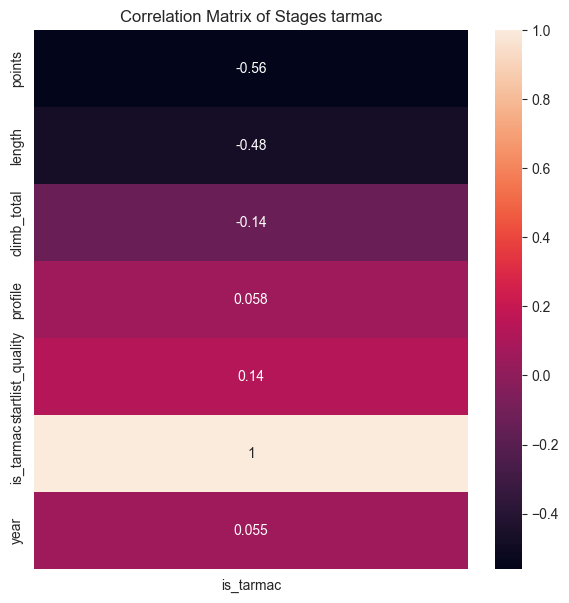

In [32]:
# checking correlation of is_tarmac to something
stages_df["is_tarmac"] = stages_df["is_tarmac"].astype(int)
corr = stages_df.corr(method="spearman", numeric_only=True)
tarmac_corr = corr["is_tarmac"]
plt.figure(figsize=(7, 7))
plt.title("Correlation Matrix of Stages tarmac")
sns.heatmap(
    tarmac_corr.values.reshape((tarmac_corr.values.shape[-1], 1)),
    annot=True,
    yticklabels=tarmac_corr.index,
    xticklabels=["is_tarmac"],
)

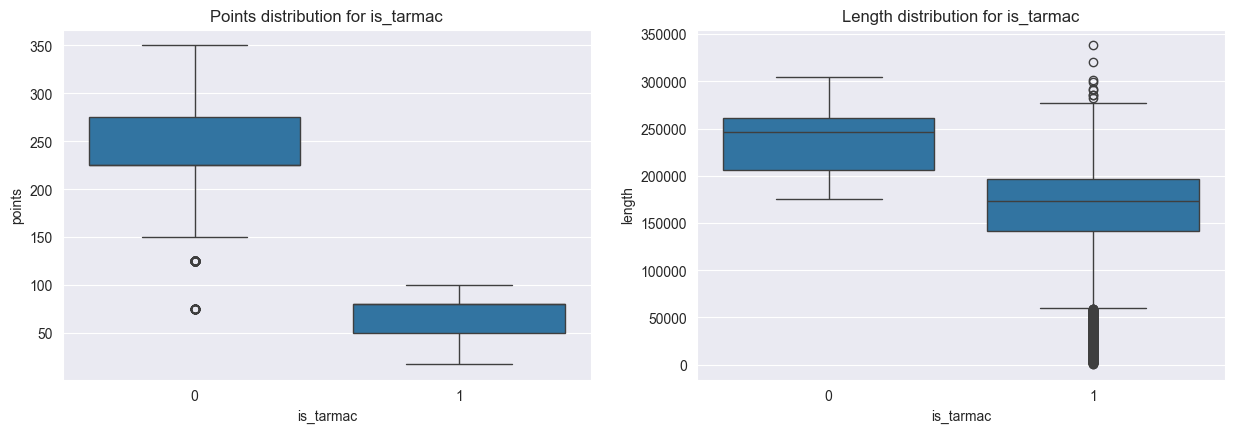

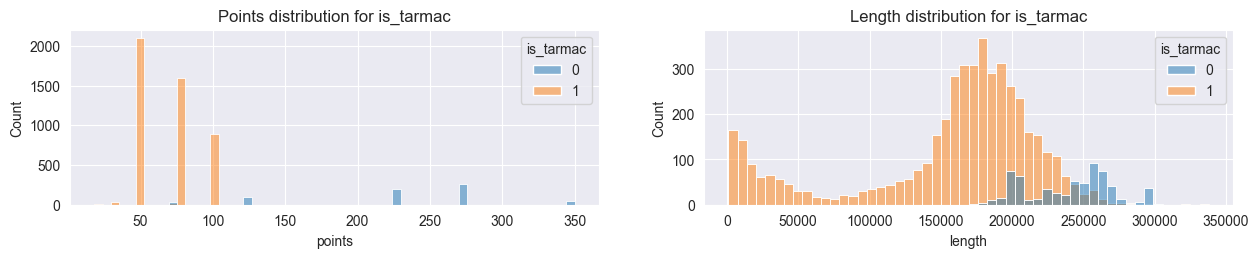

In [33]:
# showing boxplot of points and length for the two values of is_tarmac
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x="is_tarmac", y="points", data=stages_df)
plt.title("Points distribution for is_tarmac")
plt.subplot(2, 2, 2)
sns.boxplot(x="is_tarmac", y="length", data=stages_df)
plt.title("Length distribution for is_tarmac")
# showing histogram of points and length for the two values of is_tarmac
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 3)
sns.histplot(x="points", data=stages_df, hue="is_tarmac")
plt.title("Points distribution for is_tarmac")
plt.subplot(2, 2, 4)
sns.histplot(x="length", data=stages_df, hue="is_tarmac")
plt.title("Length distribution for is_tarmac")
plt.show()

In [34]:
# remove is_tarmac column. As discussed in class this should be always true
stages_df.drop(columns=["is_tarmac"], inplace=True)
races_df.drop(columns=["is_tarmac"], inplace=True)

### Resolve Deltas

The delta column have some negative values and also the delta is 0 for the team not for the single cyclist!!!

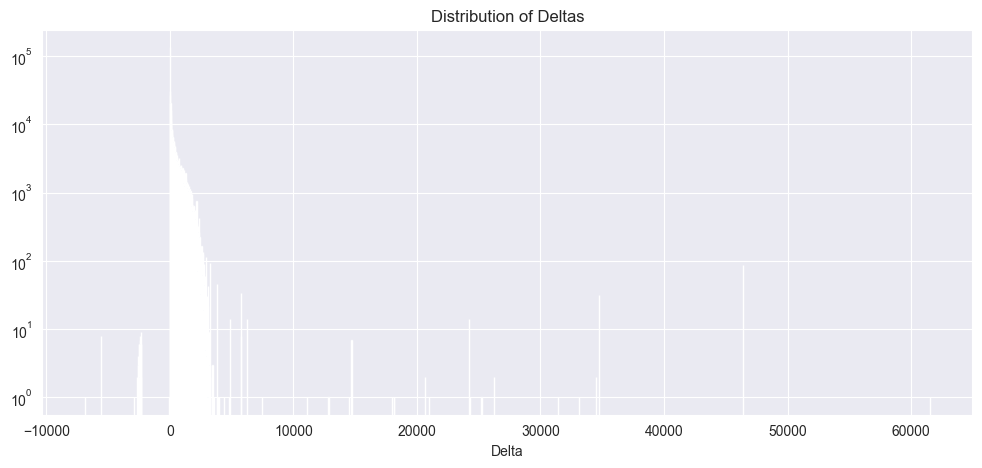

In [35]:
# plotting distribution of deltas
plt.figure(figsize=(12, 5))
plt.hist(races_df.delta, bins="auto")
plt.yscale("log")
plt.title("Distribution of Deltas")
plt.xlabel("Delta")
plt.show()

In [36]:

from libraries import scraping

races_delta_scrape_df = scraping.scrape(races_df.copy())

Scraping negative deltas
Negative deltas found in:
Stage(url='https://www.procyclingstats.com/race/vuelta-a-espana/1992/stage-19')
Stage(url='https://www.procyclingstats.com/race/paris-nice/1990/stage-7a')
Stage(url='https://www.procyclingstats.com/race/tour-de-france/2003/stage-12')
Stage(url='https://www.procyclingstats.com/race/tour-de-suisse/1993/stage-4')


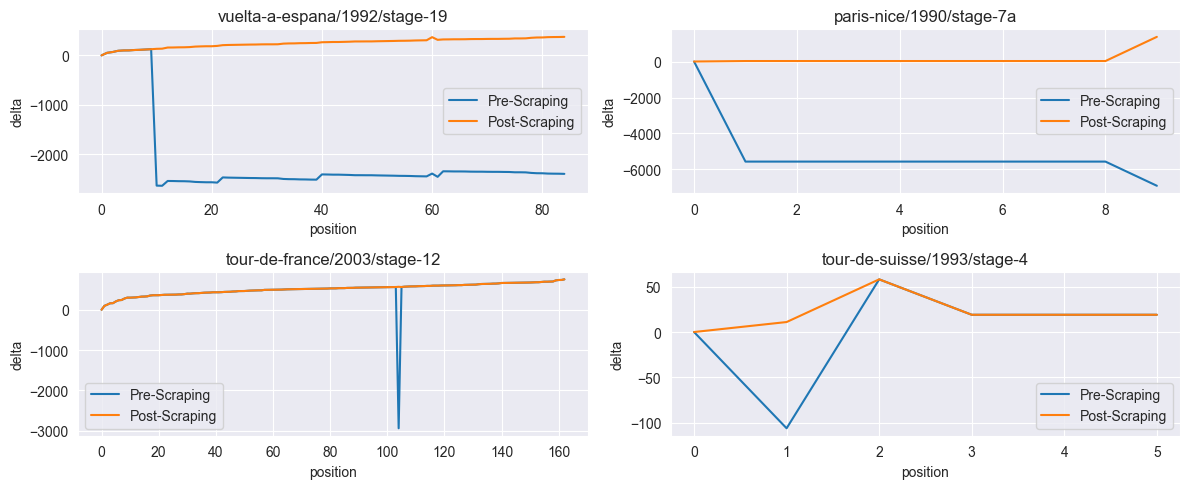

In [37]:
# compare the deltas of the pre and post scraping stages
bad_urls = [
    "vuelta-a-espana/1992/stage-19",
    "paris-nice/1990/stage-7a",
    "tour-de-france/2003/stage-12",
    "tour-de-suisse/1993/stage-4",
]


plt.figure(figsize=(12, 5))
for i, stage in enumerate(bad_urls):
    plt.subplot(2, 2, i + 1)
    sns.lineplot(
        x="position",
        y="delta",
        data=races_df.loc[races_df._url == stage],
        label="Pre-Scraping",
    )
    sns.lineplot(
        x="position",
        y="delta",
        data=races_delta_scrape_df.loc[races_delta_scrape_df._url == stage],
        label="Post-Scraping",
    )
    plt.title(stage)

plt.legend()
plt.tight_layout()
plt.show()

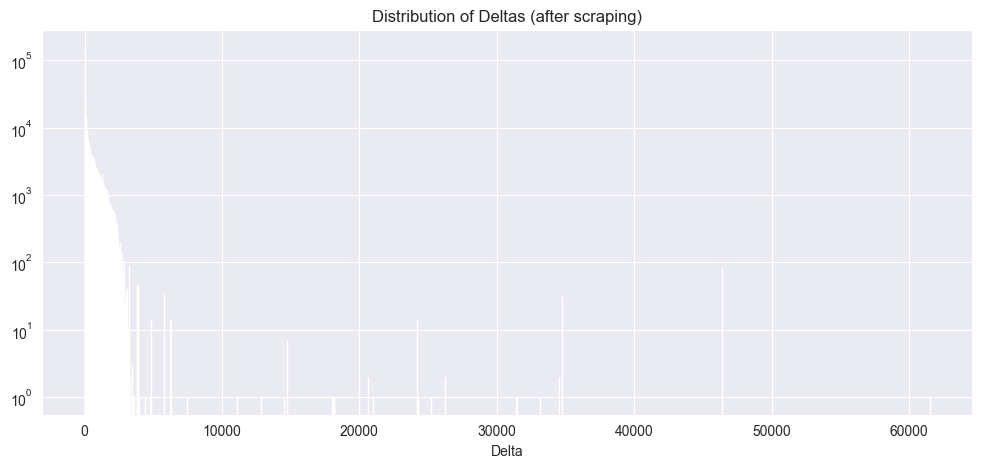

In [38]:
# plotting distribution of deltas

plt.figure(figsize=(12, 5))
plt.hist(races_delta_scrape_df.delta, bins="auto")
plt.yscale("log")
plt.title("Distribution of Deltas (after scraping)")
plt.xlabel("Delta")
plt.show()

In [39]:
races_delta_clean_df = scraping.clean(races_delta_scrape_df.copy())

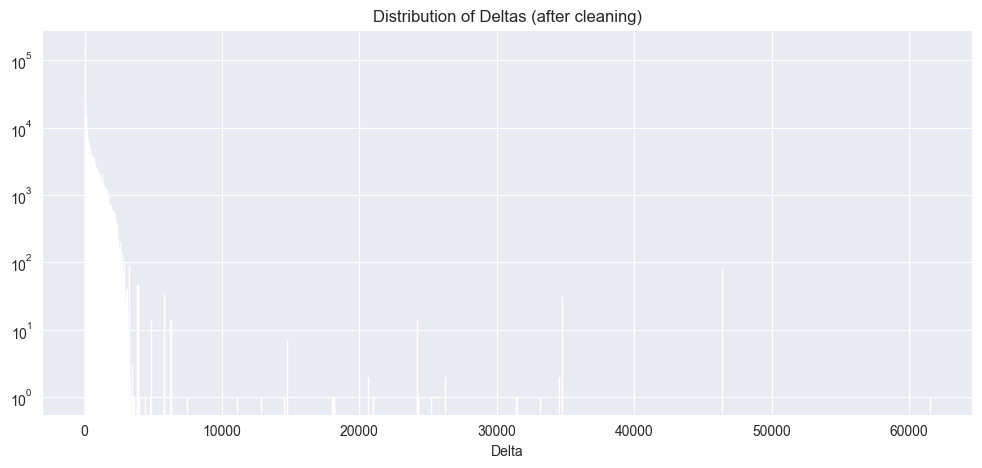

In [40]:
# plotting distribution of deltas

plt.figure(figsize=(12, 5))
plt.hist(races_delta_clean_df.delta, bins="auto")
plt.yscale("log")
plt.title("Distribution of Deltas (after cleaning)")
plt.xlabel("Delta")
plt.show()

### Resolve positions

First position in a race is 0. We can check it looking on the web.

Some positions are duplicate. since we cannot infer in any way which is the real one, remove both

In [41]:
races_df.drop_duplicates(
    subset=races_df.columns.difference(["position"]), keep=False, inplace=True
)

### Resolve profiles and total_climb

Some races have missing profiles. Try to fix looking to the climb_total distribution

In [42]:
# Profile is numerical (difficulty of trace) missing for some races
print(races_df.profile.unique())

[ 1.  5. nan  3.  2.  4.]


<Axes: xlabel='profile', ylabel='climb_total'>

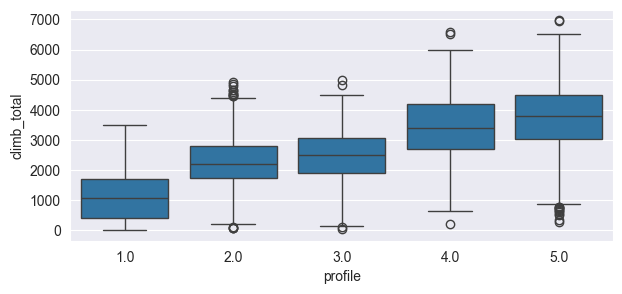

In [43]:
plt.figure(figsize=(7, 3))
sns.boxplot(
    data=stages_df[["profile", "climb_total"]],
    x="profile",
    y="climb_total",
)

<Axes: xlabel='climb_total', ylabel='Count'>

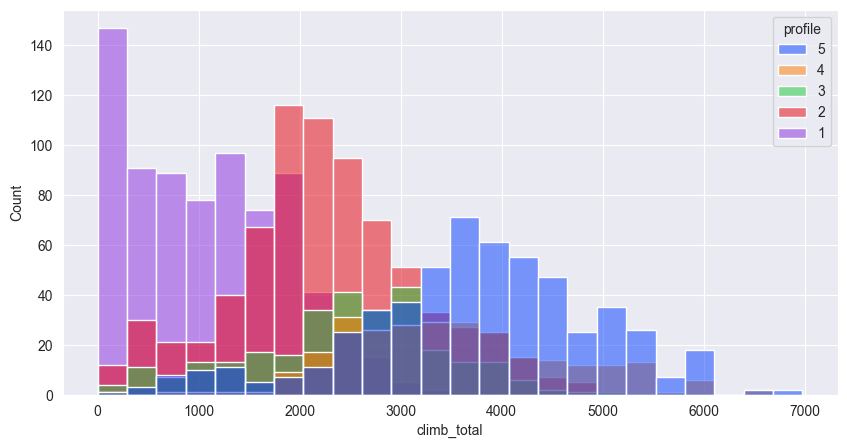

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=stages_df,
    x="climb_total",
    hue="profile",
    palette="bright",
    hue_order=[5, 4, 3, 2, 1],
)

Look at correlation between the two

In [45]:
old_stages = stages_df.copy(deep=True)

In [46]:
old_stages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   int64         
 5   length             5281 non-null   float64       
 6   climb_total        3067 non-null   float64       
 7   profile            2873 non-null   float64       
 8   startlist_quality  5281 non-null   int64         
 9   year               5281 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 582.9+ KB


In [47]:
not_nan_df = stages_df.loc[(stages_df.profile.notna() & stages_df.climb_total.notna())]
print("not nan urls", not_nan_df._url.unique().shape)

print(not_nan_df.profile.corr(not_nan_df.climb_total, method="spearman"))
print(not_nan_df.profile.corr(not_nan_df.climb_total, method="kendall"))

not nan urls (2614,)
0.7196510433732758
0.572520132871134


the two columns are correlated (spearman > 0.7, kendall > 0.55)

In [48]:
print(
    stages_df.loc[(stages_df.profile.notna() & stages_df.climb_total.isna())].shape
)  # have profile, don't have climb_total
print(
    stages_df.loc[(stages_df.profile.isna() & stages_df.climb_total.notna())].shape
)  # have climb_total, don't have profile

(259, 10)
(453, 10)


In [49]:
# tried median imputation, but it changes the distribution of the data
# tried assigning value to class with the closest median

stages_df = old_stages.copy(deep=True)

# medians = []
# for i in range(1, 6):
#     mask = stages_df.profile == i
#     medians.append(stages_df.loc[mask, "climb_total"].median())

# mask = stages_df.profile.isna() & stages_df.climb_total.notna()
# temp_df = stages_df.loc[mask]


# for i, row in temp_df.iterrows():
#     min_diff = float("inf")
#     for j in range(5):
#         diff = abs(row["climb_total"] - medians[j])
#         if diff < min_diff:
#             min_diff = diff
#             profile = j + 1

#     stages_df.loc[i, "profile"] = profile

all_df = stages_df.loc[stages_df.climb_total.notna(), ["profile", "climb_total"]]

imputer = imp.KNNImputer(n_neighbors=1, weights="distance")
imputation = imputer.fit_transform(all_df)
df_temp = pd.DataFrame(imputation, columns=["profile", "climb_total"])
df_temp.profile = np.round(df_temp.profile).astype(int)
print(df_temp.climb_total.shape)
stages_df.loc[stages_df.climb_total.notna(), "profile"] = df_temp.profile.values

(3067,)


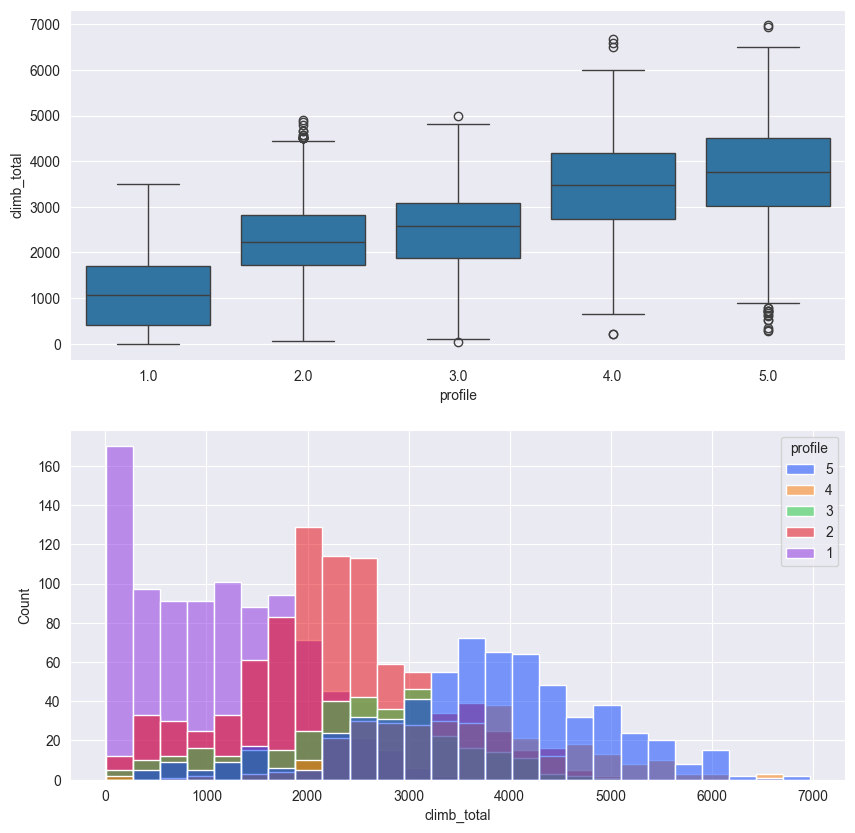

In [50]:
# see how distribution changed
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=stages_df, x="profile", y="climb_total")
plt.subplot(2, 1, 2)
sns.histplot(
    data=stages_df,
    x="climb_total",
    hue="profile",
    palette="bright",
    hue_order=[5, 4, 3, 2, 1],
)
plt.show()

As thetwo columns are correlated, we remove climb total

In [51]:
stages_df.drop(columns=["climb_total"], inplace=True)
races_df.drop(columns=["climb_total"], inplace=True)

for i, row in stages_df.iterrows():
    mask = races_df._url == row["_url"]
    races_df.loc[mask, "profile"] = row["profile"]

### Look startlist quality

The startlist are integers representing how strong the lineup is. They are sparse.

<Axes: xlabel='startlist_quality', ylabel='Count'>

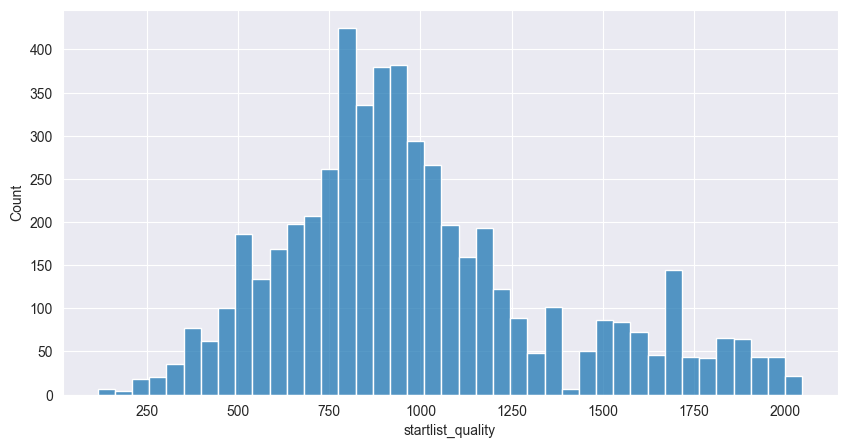

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(stages_df.startlist_quality)

Consideration: clearly not normally distributed.

### Resolve teams

Teams names change across different years and different courses. They are dependent on sponsors, and in general they do not work like a formula 1 team (i.e. consisten through the years)

In [53]:
races_df.drop(columns=["cyclist_team"], inplace=True)

### Solve length

Look at length to see if there is some noise

In [54]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   int64         
 5   length             5281 non-null   float64       
 6   profile            3326 non-null   float64       
 7   startlist_quality  5281 non-null   int64         
 8   year               5281 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 541.6+ KB


<Axes: xlabel='length', ylabel='Count'>

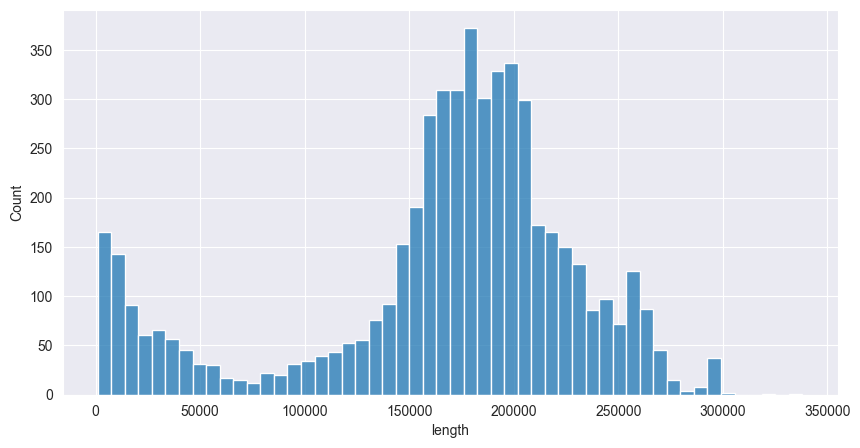

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(stages_df.length)

In [56]:
# check if it is made of integers if all numbers are rounded to second decimal
assert all([np.round(num, 2).is_integer() for num in stages_df.length])

print(np.min(stages_df.length), np.max(stages_df.length))
# if here means can convert to integer safely
stages_df.length = np.round(stages_df.length).astype(int)

1000.0 338000.0


<Axes: xlabel='length', ylabel='Count'>

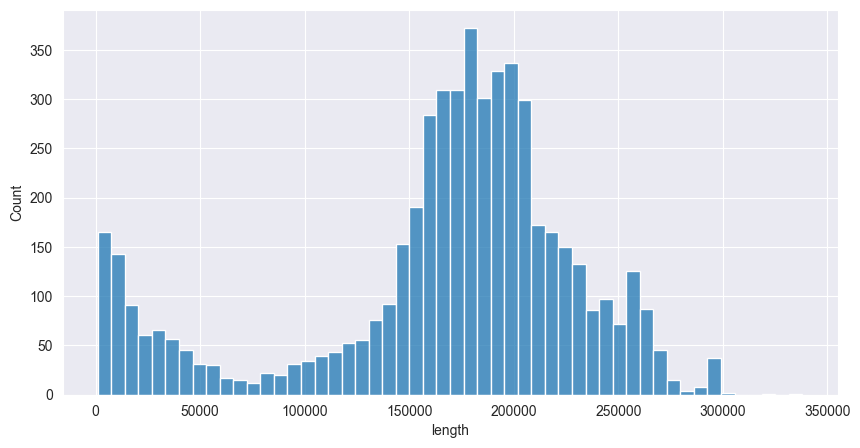

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(stages_df.length)

## Cool class

Now we can build the joined table and analyze the data together

In [58]:
class DataMerger:
    def __init__(self, races_csv, cyclist_csv, merged_csv=None):
        # So keep ref to all datasets and make one joined
        self.races_df = races_csv
        self.cyclist_df = cyclist_csv

        if merged_csv == None:
            self.df = pd.merge(
                self.races_df,
                self.cyclist_df,
                left_on="cyclist",
                right_on="_url",
                how="inner",
            )
        else:
            self.df = pd.read_csv(merged_csv, parse_dates=["date"])

        # Delete useless columns for the joined table
        self.delete_column("_url_y")

        # Rename to understand better
        self.df.rename(
            columns={
                "_url_x": "url",
            },
            inplace=True,
        )

        # dm.export_csv() # Save the merged version of dataset

    def delete_column(self, col):
        self.df.drop(columns=[col], inplace=True)

    def fill_nan(self, column, value):
        self.df[column].fillna(value, inplace=True)

    def export_csv(self):
        return self.df.to_csv("./dataset/dataset.csv")

    def correlate(self):
        correlations = {
            correlation_type: self.df.corr(numeric_only=True, method=correlation_type)
            for correlation_type in ("kendall", "pearson", "spearman")
        }

        for i, k in enumerate(correlations.keys()):
            correlations[k].loc[:, "correlation_type"] = k

        # Loop through each correlation type and create separate plots
        for corr_type, corr_matrix in correlations.items():
            corr_matrix = corr_matrix.drop(columns=["correlation_type"])

            # Create a new figure for each correlation type
            plt.figure(figsize=(12, 12))

            # Plot the heatmap
            sns.heatmap(
                corr_matrix,
                annot=True,
                cmap="coolwarm",
                fmt=".2f",
                linewidths=0.5,
            )

            # Set the title for the plot
            plt.title(f"{corr_type.capitalize()} Correlation")

            # Display the plot
            plt.show()

    def normalize(self):
        numeric_columns = [
            "points",
            "length",
            "climb_total",
            "profile",
            "startlist_quality",
            "cyclist_age",
            "delta",
            "birth_year",
            "weight",
            "height",
        ]
        scaler = StandardScaler()  # Si prova con la zscore ora eh
        self.df[numeric_columns] = scaler.fit_transform(self.df[numeric_columns])

In [59]:
dm = DataMerger(races_df, cyclist_df)  # Initialize the datasets

In [60]:
dm.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589771 entries, 0 to 589770
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   url                589771 non-null  object        
 1   points             589771 non-null  int64         
 2   length             589771 non-null  float64       
 3   profile            475349 non-null  float64       
 4   startlist_quality  589771 non-null  int64         
 5   date               589771 non-null  datetime64[ns]
 6   position           589771 non-null  int64         
 7   cyclist            589771 non-null  object        
 8   cyclist_age        589658 non-null  float64       
 9   delta              589771 non-null  float64       
 10  race               589771 non-null  object        
 11  year               589771 non-null  int64         
 12  stage              589771 non-null  object        
 13  name               589771 non-null  object  

In [61]:
# Try to fix missing birth_year or age using the other column. Nothing they always nan at the same time

ages = dm.df.groupby("cyclist")["cyclist_age"].unique()

ages = ages.apply(lambda x: np.isnan(x).all())
# names for which is true
ages = ages[ages == True].index

for idx, name in enumerate(ages):
    print(idx, name)
    print(cyclist_df.loc[cyclist_df._url == name].birth_year)

0 alexandr-osipov
2536   NaN
Name: birth_year, dtype: float64
1 antonio-zanini
894   NaN
Name: birth_year, dtype: float64
2 batik-odriozola
6080   NaN
Name: birth_year, dtype: float64
3 carlos-garcia
2515   NaN
Name: birth_year, dtype: float64
4 filippo-simonetti
2408   NaN
Name: birth_year, dtype: float64
5 javier-luquin
4384   NaN
Name: birth_year, dtype: float64
6 nevens-guy
3551   NaN
Name: birth_year, dtype: float64
7 nicolai-kosyakov
3046   NaN
Name: birth_year, dtype: float64
8 oscar-pumar
4142   NaN
Name: birth_year, dtype: float64
9 scott-davies
9    1995.0
Name: birth_year, dtype: float64
10 sergei-jermachenko
6072   NaN
Name: birth_year, dtype: float64
11 thierry-lauder
4756   NaN
Name: birth_year, dtype: float64
12 vladimir-malakov
601    1958.0
Name: birth_year, dtype: float64


# Distribution analysis


To analyze the distribution the distribution we need to work on merged table but also on individual tables.
- **Cyclists table** is already ready.
- **Races table** is not ready. we need to group by race to analyze the attribute relative to a race.
- **Merged table** is not ready. we need to throw away columns relative to a single race (static attributes).

In [62]:
stages_df = stages_df.convert_dtypes()
races_df = races_df.convert_dtypes()
cyclist_df = cyclist_df.convert_dtypes()

First of all let's retrieve the race table without duplicates of static attributes and plot the distributions

In [63]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   string 
 1   name         6095 non-null   string 
 2   birth_year   6084 non-null   Int64  
 3   weight       3134 non-null   Float64
 4   height       3134 non-null   Float64
 5   nationality  6095 non-null   string 
dtypes: Float64(2), Int64(1), string(3)
memory usage: 351.2 KB


In [64]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589771 entries, 0 to 589864
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589771 non-null  string        
 1   points             589771 non-null  Int64         
 2   length             589771 non-null  Float64       
 3   profile            475349 non-null  Int64         
 4   startlist_quality  589771 non-null  Int64         
 5   date               589771 non-null  datetime64[ns]
 6   position           589771 non-null  Int64         
 7   cyclist            589771 non-null  string        
 8   cyclist_age        589658 non-null  Int64         
 9   delta              589771 non-null  Int64         
 10  race               589771 non-null  string        
 11  year               589771 non-null  Int64         
 12  stage              589771 non-null  string        
dtypes: Float64(1), Int64(7), datetime64[ns](1), strin

In [65]:
# grouped_races_df = races_df.groupby(
#     [
#         "_url",
#     ]
# )[
#     [
#         "_url",
#         "name",
#         "points",
#         "uci_points",
#         "length",
#         "climb_total",
#         "profile",
#         "startlist_quality",
#         "date",
#     ]
# ].apply(lambda x: x)
# specifying datatype
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, amstel-gold-race/1970/result to world-championship/2022/result
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   string        
 1   stage              5281 non-null   string        
 2   race               5281 non-null   string        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   Int64         
 5   length             5281 non-null   Int64         
 6   profile            3326 non-null   Int64         
 7   startlist_quality  5281 non-null   Int64         
 8   year               5281 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1), string(3)
memory usage: 567.4+ KB


<Figure size 1200x1000 with 0 Axes>

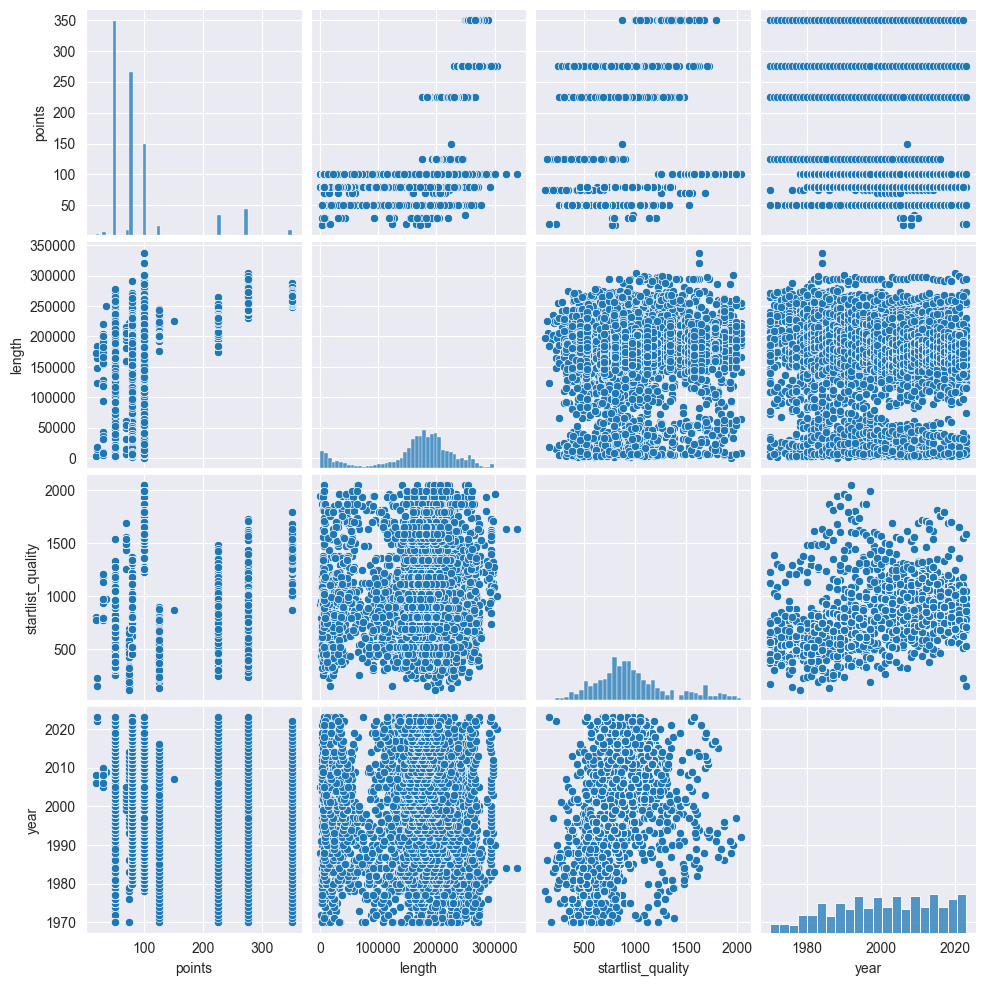

In [66]:
# def plot(df, col, *args, **kwargs):
#     plt.figure(figsize=(12, 10))
#     plt.subplot(2, 2, 1)  # (rows, columns, index)
#     sns.histplot(x=col, data=df, *args, **kwargs)
#     plt.xticks(rotation=90, ha="right")
#     plt.subplot(2, 2, 2)  # (rows, columns, index)
#     sns.boxplot(x=col, data=df)
#     plt.xticks(rotation=90, ha="right")
#     plt.show()


# plot(grouped_races_df, "points")
# plot(grouped_races_df, "length")
# plot(grouped_races_df, "startlist_quality")
# plot(grouped_races_df, "date")

plt.figure(figsize=(12, 10))
sns.pairplot(stages_df[["points", "length", "startlist_quality", "year"]])

Now we can analyze the attributes that are related both on race and on cyclist (Ex position)

Now we can build the build the correlation matrix to try to understand which columns are correlated.

<Axes: title={'center': 'Correlation Matrix of Stages'}>

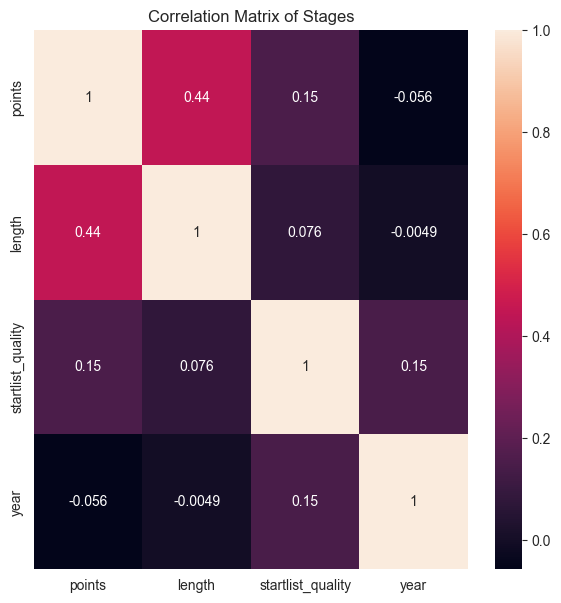

In [67]:
correlations = stages_df.corr(method="pearson", numeric_only=True)
correlations.drop(columns=["profile"], inplace=True)
correlations.drop(index=["profile"], inplace=True)

plt.figure(figsize=(7, 7))
plt.title("Correlation Matrix of Stages")
sns.heatmap(correlations, annot=True)

<Axes: title={'center': 'Correlation Matrix of Stages profile'}>

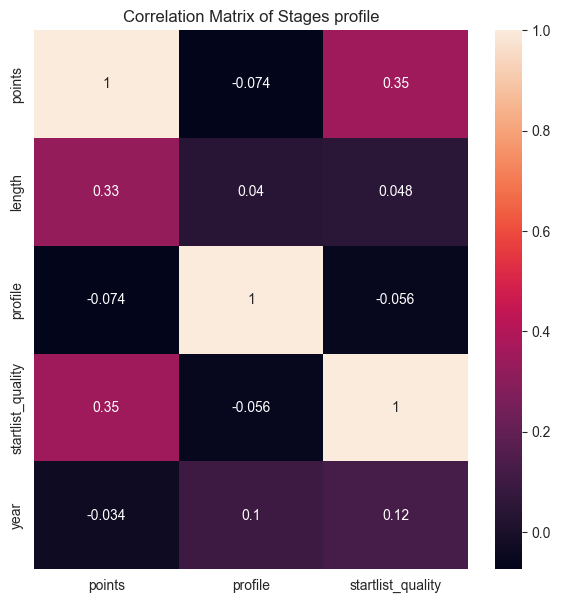

In [68]:
correlations = stages_df.corr(method="kendall", numeric_only=True)
correlations = correlations[["points", "profile", "startlist_quality"]]

plt.figure(figsize=(7, 7))
plt.title("Correlation Matrix of Stages profile")
sns.heatmap(correlations, annot=True)

Until now we have looked at stages. still need to look at cyclist performances in races.

In [69]:
cyclist_df.reset_index(drop=True, inplace=True)
races_df.reset_index(drop=True, inplace=True)
races_df = races_df.merge(cyclist_df, left_on="cyclist", right_on="_url", how="inner")

In [70]:
print(races_df.info())

races_df.drop(columns=["_url_y", "name"], inplace=True)
races_df.rename(columns={"_url_x": "_url"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589771 entries, 0 to 589770
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url_x             589771 non-null  string        
 1   points             589771 non-null  Int64         
 2   length             589771 non-null  Float64       
 3   profile            475349 non-null  Int64         
 4   startlist_quality  589771 non-null  Int64         
 5   date               589771 non-null  datetime64[ns]
 6   position           589771 non-null  Int64         
 7   cyclist            589771 non-null  string        
 8   cyclist_age        589658 non-null  Int64         
 9   delta              589771 non-null  Int64         
 10  race               589771 non-null  string        
 11  year               589771 non-null  Int64         
 12  stage              589771 non-null  string        
 13  _url_y             589771 non-null  string  

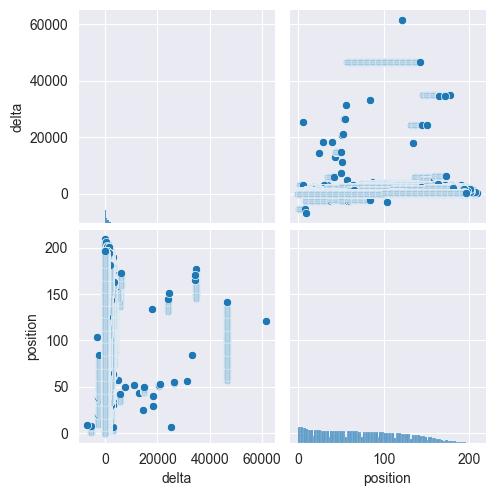

In [71]:
sns.pairplot(races_df[["delta", "position"]])

In [72]:
correlation = races_df[["delta", "position"]].corr(method="kendall")
correlation

,delta,position
delta,1.000000,0.296571
position,0.296571,1.000000


We can observe that the columns:
- **climb_total** and **profile** are highly correlated
- **weight** and **height** are highly correlated.
- **points** and **uci_points** are highly correlated.
- **climb_total** and **profile** are highly correlated.

Let's see a final overview over the merged table

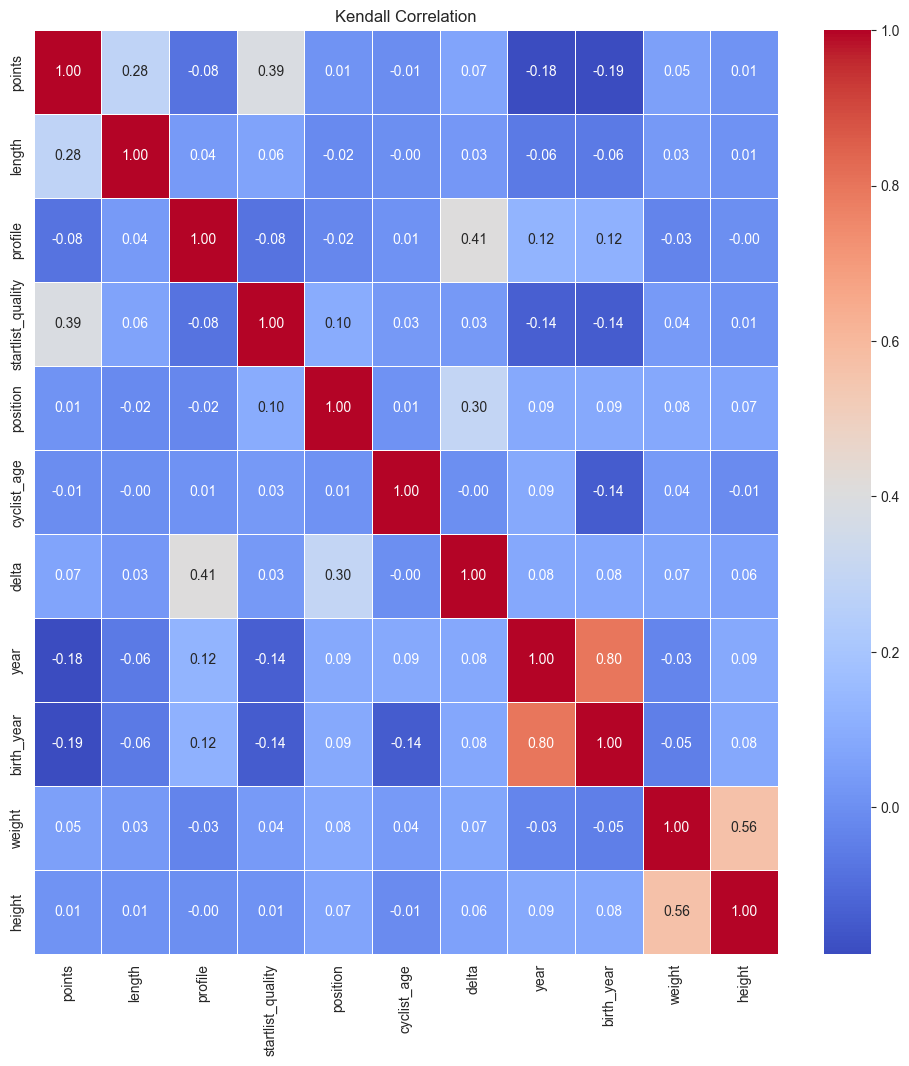

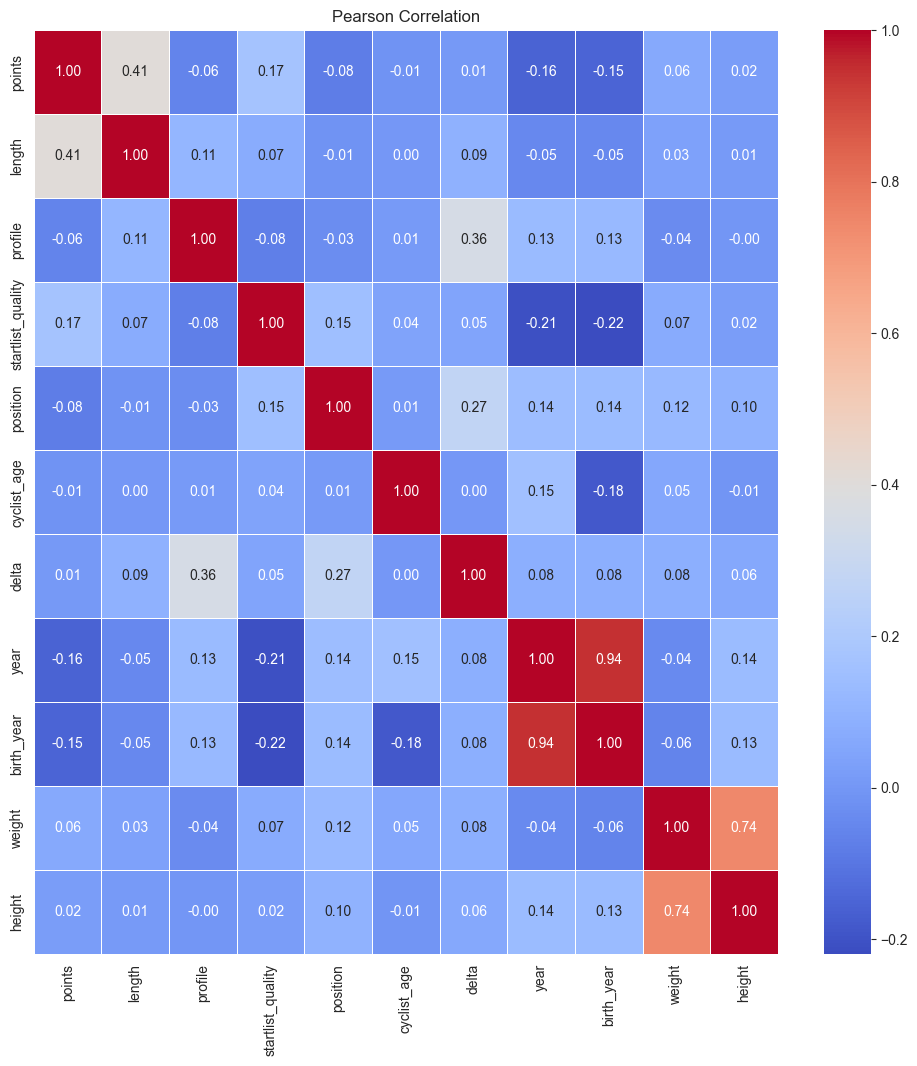

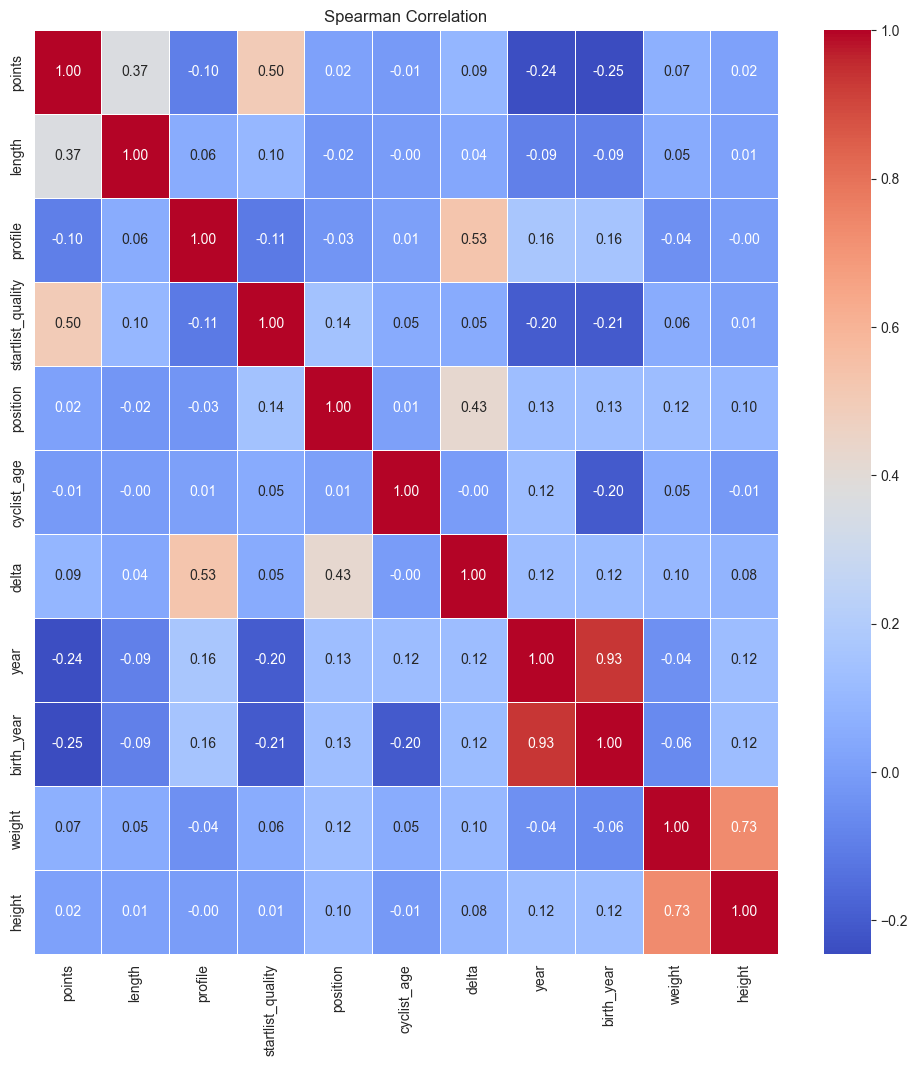

In [73]:
dm.correlate()

In [74]:
races_df.to_csv("./dataset/merge_clean_v1.csv", index=False)
cyclist_df.to_csv("./dataset/cyclist_clean_v1.csv", index=False)
stages_df.to_csv("./dataset/stages_clean_v1.csv", index=False)